# Punto3
## Algoritmo Genético
### Nicolás Patalagua

Importamos las librerias a usar:

In [0]:
import random
!pip install pyeasyga
from pyeasyga import pyeasyga
import matplotlib.pyplot as plt

Ingresamos la cantidad de panqueques:

In [6]:
n = int(input("Digite el tamaño de la stack: "))
Stack= [i for i in range(1, n + 1)]

Digite el tamaño de la stack: 5


Definimos la función de creación de individuos:

In [0]:
def create_individual(data):
    individual = data[:]
    random.shuffle(individual)
    return individual

Definimos la función fitness:

In [0]:
def fitness(indivudal, data):
    consecutivos = 0
    for i in range(len(indivudal)):
        if i > 0:
            if (indivudal[i] - 1) == (indivudal[i - 1]):
                consecutivos += 1
    return consecutivos

Definimos una función de promedio del fitness:

In [0]:
def average_fitness():
    fitness_po = [i.fitness for i in ga.current_generation]
    average = sum(fitness_po) / len(fitness_po)
    return format(average)

Definimos la función crossover:

In [0]:
def crossover(parent_1, parent_2):
    return parent_1, parent_2

Definimos la función de selección:

In [0]:
def selection(population):
    selected = random.choice(population)
    return selected

Definimos la función mutación:

In [0]:
def mutate(individual):
    mutate_index1 = random.randrange(len(individual))
    mutate_index2 = random.randrange(len(individual))
    individual[mutate_index1], individual[mutate_index2] = individual[mutate_index2], individual[mutate_index1]

Adisgnamos los parametros:

In [0]:
ga = pyeasyga.GeneticAlgorithm(Stack,
                               population_size=200,
                               generations=100,
                               crossover_probability=0.8,
                               mutation_probability=0.2,
                               elitism=True,
                               maximise_fitness=True)

Asignamos las funciones:

In [0]:
ga.create_individual = create_individual
ga.crossover_function = crossover
ga.mutate_function = mutate
ga.fitness_function = fitness
ga.create_first_generation()

Parametros para la grafica:

In [0]:
ejex0 = []
ejey0 = []
ejey1 = []

for i in range(1000):
    ga.create_next_generation()
    fitness = ga.best_individual()[0]
    ejey0.append(float(fitness))
    ejey1.append(float(average_fitness()))
    ejex0.append(float(format(i)))

Calculos a realizarse:

In [0]:
mejorposible = (n - 1)
mejorobtenido = int(ga.best_individual()[0])
prcentaje = float((100 * mejorobtenido) / mejorposible)

Imprimimos los resultados:

In [18]:
print("Porcentaje de acierto obtenido: " + str(prcentaje) + "%")
print("Fitness de la mejor solucion: " + str(mejorobtenido))
print("Mejor fitness posible: " + str(mejorposible))
print("Solucion: " + str(ga.best_individual()[1]) + "\n")

Porcentaje de acierto obtenido: 100.0%
Fitness de la mejor solucion: 4
Mejor fitness posible: 4
Solucion: [1, 2, 3, 4, 5]



Definimos los parametros de la grafica:

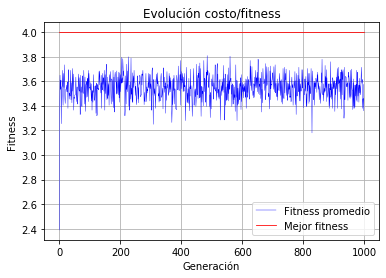

In [19]:
plt.plot(ejex0, ejey1, '-', linewidth=0.4, color='b', label='Fitness promedio')
plt.plot(ejex0, ejey0, '-', linewidth=0.8, color='r', label='Mejor fitness')
plt.title('Evolución costo/fitness')
plt.xlabel('Generación')
plt.ylabel('Fitness')
plt.legend()
plt.grid()
plt.show()